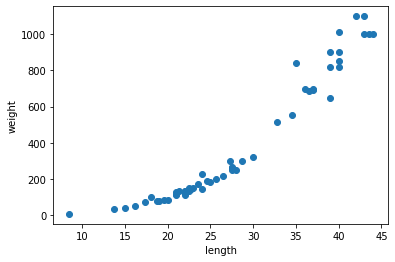

In [86]:
########################
# 지도학습 - regression
########################
import matplotlib.pyplot as plt
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [87]:
# 훈련데이터와 검증 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test_train, Y_target, Y_test_target = \
    train_test_split(perch_length, perch_weight, random_state=42)
print(f"before X_train.shape= {X_train.shape}, Y_target.shape= {Y_target.shape}")

# sklearn은 훈련데이터가 2차원 이상의 배열로 되어 있어야 함
X_train = X_train.reshape(-1, 1)
X_test_train = X_test_train.reshape(-1, 1)
print(f"after X_train.shape= {X_train.shape}, Y_target.shape= {Y_target.shape}")

before X_train.shape= (42,), Y_target.shape= (42,)
after X_train.shape= (42, 1), Y_target.shape= (42,)


In [88]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train, Y_target)

# 분류(Classification)에서는 정답을 맞추는 정확도라고 하지만, 
# 회귀(Regression)에서는 정확한 숫자를 맞춘다는 것은 불가능하기에 정확도가 아닌 결정계수(R^2, Coefficient of determination)로 표현함
# 테스트세트가 훈련세트보다 score가 더 높기 때문에 과소적합 (데이터가 적어서 발생함)
print(f"훈련데이터의 score = {knr.score(X_train, Y_target)}")
print(f"검증데이터의 score = {knr.score(X_test_train, Y_test_target)}")


훈련데이터의 score = 0.9698823289099254
검증데이터의 score = 0.992809406101064


In [89]:
y_pred = knr.predict(X_test_train)
print(y_pred)

# MAE : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test_target, y_pred)
print(f"mae = {mae}")

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]
mae = 19.157142857142862


In [90]:
# 과소적합으로 학습을 더 많이 시킬려면, neighbors를 줄이는 방법이 있음 (모델이 복잡해짐)
knr.n_neighbors = 3 # default 5

knr.fit(X_train, Y_target)

print(f"훈련데이터의 score = {knr.score(X_train, Y_target)}")
print(f"검증데이터의 score = {knr.score(X_test_train, Y_test_target)}")

훈련데이터의 score = 0.9804899950518966
검증데이터의 score = 0.9746459963987609


x=50 -> y_pred=[1033.33333333]
new_x=100 -> new_y_pred=[1033.33333333]


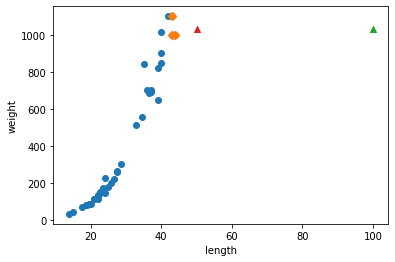

In [91]:
# 검증 50cm의 무게 예측
# neighbors의 regressor는 이웃점간을 기준으로 예측이기에 훈련데이터 값을 넘어선 예측의 경우, 이웃에 근접한 예측을 하기에 오류 발생
import matplotlib.pyplot as plt
x = 50
y_pred = knr.predict([[x]])
print(f"x={x} -> y_pred={y_pred}")

new_x = 100
new_y_pred = knr.predict([[new_x]])
print(f"new_x={new_x} -> new_y_pred={new_y_pred}")

distance, indexes = knr.kneighbors([[50]])

plt.scatter(X_train, Y_target)
plt.scatter(X_train[indexes], Y_target[indexes], marker="D")
plt.scatter(new_x, new_y_pred, marker="^")
plt.scatter(x, y_pred, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

x=50 -> y_pred=[1241.83860323]
new_x=100 -> new_y_pred=[3192.69585141]


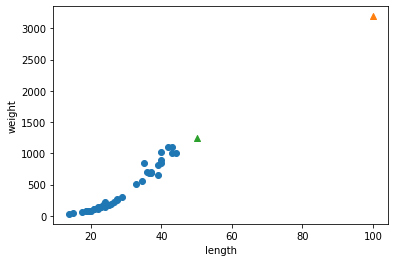

In [92]:
# 선형회귀 모델 Y = a*x + b
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, Y_target)
x = 50
y_pred = lr.predict([[x]])
print(f"x={x} -> y_pred={y_pred}")
new_x = 100
new_y_pred = lr.predict([[new_x]])
print(f"new_x={new_x} -> new_y_pred={new_y_pred}")

plt.scatter(X_train, Y_target)
plt.scatter(new_x, new_y_pred, marker="^")
plt.scatter(x, y_pred, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [93]:
# 선형회귀 모델의 functions
print(dir(lr))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_preprocess_data', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_residues', '_set_intercept', '_validate_data', 'coef_', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_features_in_', 'n_jobs', 'normalize', 'positive', 'predict', 'rank_', 'score', 'set_params', 'singular_']


In [94]:
# 기울기(계수, coefficient) 또는 가중치(weight), 절편(intercept 또는 bias)
print(f"가중치={lr.coef_}, 절편={lr.intercept_}")
print(X_train[:10,0])
print(X_train.shape)
print(X_train[0,0], Y_target[0])

가중치=[39.01714496], 절편=-709.0186449535477
[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22. ]
(42, 1)
19.6 85.0


x=50 -> y_pred=[1241.83860323]
new_x1=2 -> new_y_pred1=[-630.98435503]
new_x=100 -> new_y_pred=[3192.69585141]


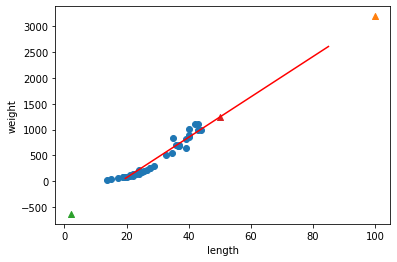

In [95]:
x = 50
y_pred = lr.predict([[x]])
print(f"x={x} -> y_pred={y_pred}")

# length가 적은 숫자일 경우, weight가 음수가 나옴
new_x1 = 2
new_y_pred1 = lr.predict([[new_x1]])
print(f"new_x1={new_x1} -> new_y_pred1={new_y_pred1}")

new_x = 100
new_y_pred = lr.predict([[new_x]])
print(f"new_x={new_x} -> new_y_pred={new_y_pred}")

plt.scatter(X_train, Y_target)
plt.plot([X_train[0,0], Y_target[0]], [X_train[0,0]*lr.coef_+lr.intercept_, Y_target[0]*lr.coef_+lr.intercept_], 'r')
plt.scatter(new_x, new_y_pred, marker="^")
plt.scatter(new_x1, new_y_pred1, marker="^")
plt.scatter(x, y_pred, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [96]:
# 결정계수 R^2 -> 검증데이터가 더 낮고, 차이가 많이 남. 과소적합
print(f"훈련데이터의 score = {lr.score(X_train, Y_target)}")
print(f"검증데이터의 score = {lr.score(X_test_train, Y_test_target)}")

훈련데이터의 score = 0.939846333997604
검증데이터의 score = 0.8247503123313558


[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]]
(42, 2)
[8103.57880667]
[60.50542483]
new_x1=3 -> new_y_pred1=[60.50542483]
new_x=100 -> new_y_pred=[8103.57880667]
가중치=[  1.01433211 -21.55792498], 절편=116.05021078278259


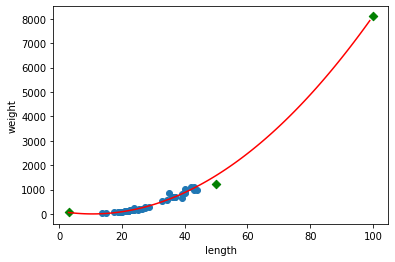

In [97]:
# 일직선 regression일 경우, length가 적어질 경우, weight가 (-)가 될 가능성이 있음.
# 해결방법) linear regression -> 다항회귀로 변경 (y = a*x^2 + b*x + c : x=length, y=weight)
new_train = np.column_stack((X_train**2, X_train))
new_test = np.column_stack((X_test_train**2, X_test_train))

print(new_train[:10])
print(new_train.shape)

new_lr = LinearRegression()
new_lr.fit(new_train, Y_target)

print(new_lr.predict([[100**2, 100]]))
print(new_lr.predict([[3**2, 3]]))

new_x1 = 3
new_y_pred1 = new_lr.predict([[3**2, 3]])
print(f"new_x1={new_x1} -> new_y_pred1={new_y_pred1}")

new_x = 100
new_y_pred = new_lr.predict([[100**2, 100]])
print(f"new_x={new_x} -> new_y_pred={new_y_pred}")

print(f"가중치={new_lr.coef_}, 절편={new_lr.intercept_}")

point = np.arange(3, 100)

plt.scatter(X_train, Y_target)
plt.scatter(new_x, new_y_pred, marker="D", color="g")
plt.scatter(new_x1, new_y_pred1, marker="D", color="g")
plt.scatter(x, y_pred, marker="D", color="g")

plt.plot(point, new_lr.coef_[0]*point**2 + new_lr.coef_[1]*point + new_lr.intercept_, 'r')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [98]:
# 결정계수 R^2
print(f"훈련데이터의 score = {new_lr.score(new_train, Y_target)}")
print(f"검증데이터의 score = {new_lr.score(new_test, Y_test_target)}")

훈련데이터의 score = 0.9706807451768623
검증데이터의 score = 0.9775935108325121
